## 総合演習1 - 相関と回帰直線


### 1.1 wgetコマンド以下のURLからでファイル（anscombe.csv）をダウンロードしてください。

```
https://gist.githubusercontent.com/murayama333/5b3cbe9ddbaadd2633b5a697242904bb/raw/bf3dd0fac6d945a8889ff3840ab0a3fa961618e9/anscombe.csv
```

In [ ]:
!wget https://gist.githubusercontent.com/murayama333/5b3cbe9ddbaadd2633b5a697242904bb/raw/bf3dd0fac6d945a8889ff3840ab0a3fa961618e9/anscombe.csv

--2021-03-09 22:17:14--  https://gist.githubusercontent.com/murayama333/5b3cbe9ddbaadd2633b5a697242904bb/raw/bf3dd0fac6d945a8889ff3840ab0a3fa961618e9/anscombe.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439 [text/plain]
Saving to: ‘anscombe.csv’

anscombe.csv        100%[===================>]     439  --.-KB/s    in 0s      

2021-03-09 22:17:15 (21.7 MB/s) - ‘anscombe.csv’ saved [439/439]



### 1.2 pandasのDataFrameで anscombe.csv を表示してください。

> DataFrameを扱う変数は `anscombe_df` とします。

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

anscombe_df = pd.read_csv("anscombe.csv")
anscombe_df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


### 1.3 DataFrame(anscombe_df)の "x1" 列の平均値を出力してください。
> ただし列の指定には変数 col_xを 使うものとします。

In [ ]:
col_x = "x1"
anscombe_df[col_x].values.mean()

9.0

### 1.4 DataFrame(anscombe_df)の "x1" 列の標準偏差を出力してください。
> 標準偏差を出力するstdメソッドの引数に ddof=1 を指定します。また列の指定には変数 col_x を使うものとします。

In [ ]:
anscombe_df[col_x].values.std(ddof=1)

3.3166247903554

### 1.5 DataFrame(anscombe_df)の "y1" 列の平均値を出力してください。
> ただし列の指定には変数 col_y を 使うものとします。

In [ ]:
col_y = "y1"
anscombe_df[col_y].values.mean()

7.500909090909093

### 1.6 DataFrame(anscombe_df)の "y1" 列の標準偏差を出力してください。
> 標準偏差を出力するstdメソッドの引数に ddof=1 を指定します。また列の指定には変数 col_y を使うものとします。

In [ ]:
anscombe_df[col_y].values.std(ddof=1)

2.031568135925815

### 1.7 DataFrame(anscombe_df)の概要を出力してください。

In [ ]:
anscombe_df[[col_x, col_y]].describe()

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


### 1.8 DataFrame(anscombe_df)の"x1"、"x2"の相関係数を出力してください。

In [ ]:
anscombe_df[[col_x, col_y]].corr()

,x1,y1
x1,1.000000,0.816421
y1,0.816421,1.000000


### 1.9 DataFrame(anscombe_df)の"x1"、"x2"の散布図を出力してください。

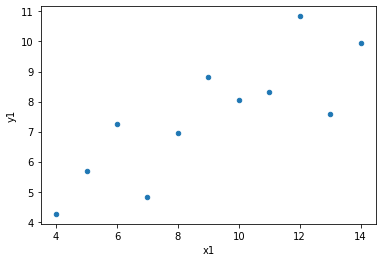

In [ ]:
anscombe_df.plot.scatter(col_x, col_y)

### 1.10 DataFrame(anscombe_df)の"x1"、"x2"の回帰直線の係数、切片を出力してください。

In [ ]:
x = anscombe_df[[col_x]].values
y = anscombe_df[col_y].values

reg = LinearRegression()
reg.fit(x, y)

print(reg.coef_)
print(reg.intercept_)


[0.50009091]
3.0000909090909094


### 1.11 DataFrame(anscombe_df)の"x1"、"x2"の回帰直線の決定係数を出力してください。
> 決定係数は reg 変数の score メソッドで出力できます。

In [ ]:
print(reg.score(x, y))

0.6665424595087748


### 1.12 DataFrame(anscombe_df)の"x1"、"x2"の散布図、回帰直線を出力してください。
> 決定係数は reg 変数の score メソッドで出力できます。

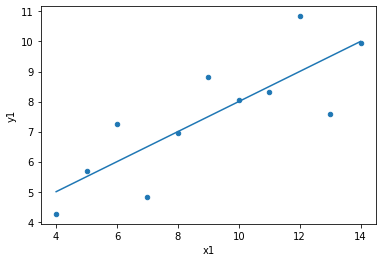

In [ ]:
x_range = np.arange(x.min(), x.max() + 0.1, 0.1).reshape(-1, 1)
ax = anscombe_df.plot.scatter(col_x, col_y)
ax.plot(x_range, reg.predict(x_range))

### 1.13 変数 col_x col_y の値を変更してDataFrame（anscombe_df）の"x2"、"y2" 列について同様に考察してください。

> "x3"、"y3" 列に組み合わせ、"x4"、"y4"の組み合わせについても同様に考察してください。


### 1.14 x1〜x4（y1〜y4）までの4つの事例から学べることを考察してください。